# maysics.image模块使用说明

image模块包含八个函数

|名称|作用|
|---|---|
|l_convert|RGB图像转换为灰度图像|
|hist|计算图像直方图数据|
|hist_graph|绘制图像直方图|
|linear_enhancement|线性增强|
|hist_equa|直方图均衡|
|laplace|图像拉普拉斯算子|

<br></br>
## RGB图像转换为灰度图像：l_convert
$$L=0.299R+0.587G+0.114B$$

<br>l_convert(data, dtype=float)
<br>```data```是图像数据
<br>```dtype```是输出图像数据的数据格式

### DEMO 1-1：RGB图像转换为灰度图像

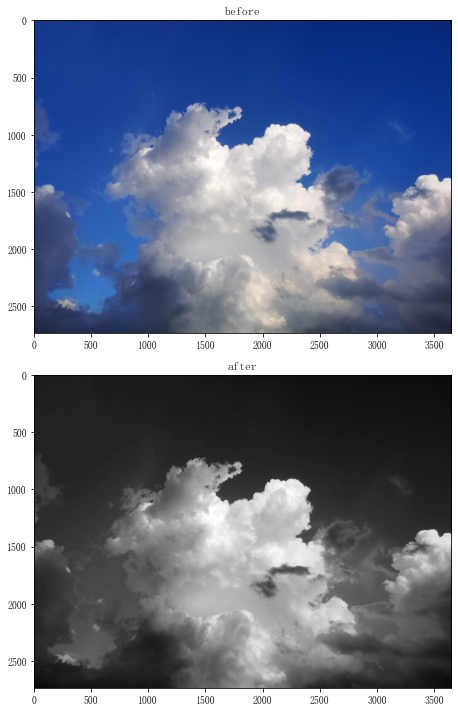

In [1]:
import maysics as ms
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(15, 10))
pic = ms.load('test1.jpg', pic=True)

ax = fig.add_subplot(2, 1, 1)
ax.imshow(pic, cmap=plt.cm.gray)
ax.set_title('before')

pic = ms.image.l_convert(pic, 'uint8')
ax = fig.add_subplot(2, 1, 2)
ax.imshow(pic, cmap=plt.cm.gray)
ax.set_title('after')

plt.tight_layout()

<br></br>
## 计算图像直方图数据：hist
hist(data)
<br>```data```：图像数据

<br>对于灰度图像，函数返回一维ndarray
<br>对于彩色RGB图像，函数返回二维ndarray

### DEMO 2-1：灰度图片的直方图数据

In [2]:
import maysics as ms

pic = ms.load('test1.jpg', pic=True)

# 转换为灰度图像
pic = ms.image.l_convert(pic, 'uint8')

ms.image.hist(pic)

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      1,      1,      3,     17,
           68,    219,    583,   1355,   2913,   6391,  13131,  23560,
        36310,  51656,  71527,  93597, 110988, 116909, 120252, 128074,
       133688, 136813, 143665, 154185, 161076, 165951, 170587, 181748,
       200822, 222045, 231642, 234217, 227059, 198978, 164570, 140476,
       130541, 125686, 122196, 116973, 114020, 112924, 106557,  97073,
        88825,  81257,  75045,  72385,  70181,  66343,  63062,  58177,
        54205,  50681,  49093,  47025,  44918,  43046,  43155,  44245,
        46884,  52045,  54410,  56230,  54980,  53601,  53033,  51623,
        49340,  46968,  45644,  45705,  45854,  47328,  48932,  51913,
        55193,  58356,  60963,  61922,  61404,  60451,  57175,  53110,
      

### DEMO 2-2：彩色RGB图片的直方图数据

In [3]:
import maysics as ms

pic = ms.load('test1.jpg', pic=True)
ms.image.hist(pic)

array([[   118,    386,   1538,   5422,  15564,  35623,  68313, 110743,
        151356, 172841, 161528, 139053, 123595, 121107, 123176, 129119,
        136499, 146034, 155514, 169814, 197894, 234500, 256461, 247324,
        208402, 161160, 126949, 105079,  91201,  82734,  74721,  69045,
         66073,  63685,  60953,  57730,  53159,  47751,  44160,  41679,
         40594,  40628,  42830,  48640,  56596,  65033,  71842,  74293,
         72152,  69090,  64806,  61780,  62206,  62597,  62787,  63373,
         63358,  61890,  59483,  56884,  54619,  53579,  52117,  49389,
         45514,  41905,  38779,  36588,  36125,  37648,  39518,  40278,
         39020,  37594,  36566,  35477,  33596,  31621,  29541,  28298,
         26704,  25711,  25368,  25071,  25081,  24968,  24840,  26047,
         26827,  27357,  27738,  27831,  27794,  29347,  30450,  32453,
         34427,  35472,  35958,  34804,  32788,  32201,  31158,  29628,
         28536,  26855,  25200,  24408,  23879,  23553,  22783, 

<br></br>
## 绘制图像直方图：hist_graph
hist_graph(data, mode=1, save=False)
<br>```data```是图像数据
<br>```mode```可选1和2，mode=1绘制折线图，mode=2绘制直方图
<br>```save```是布尔类型或字符串类型，当save为字符串时，表示保存图像

### DEMO 3-1：绘制灰度图像折线图

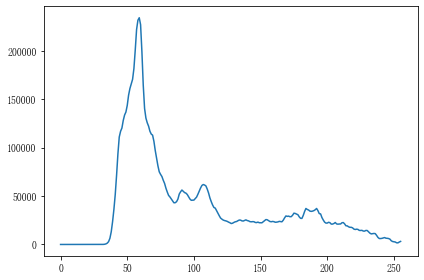

In [4]:
import maysics as ms

pic = ms.load('test1.jpg', pic=True)

# 转换为灰度图像
pic = ms.image.l_convert(pic, 'uint8')

ms.image.hist_graph(pic)

### DEMO 3-2：绘制灰度图像直方图

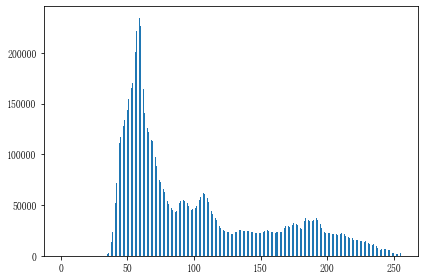

In [5]:
import maysics as ms

pic = ms.load('test1.jpg', pic=True)

# 转换为灰度图像
pic = ms.image.l_convert(pic, 'uint8')

ms.image.hist_graph(pic, mode=2)

### DEMO 3-3：绘制RGB图像折线图

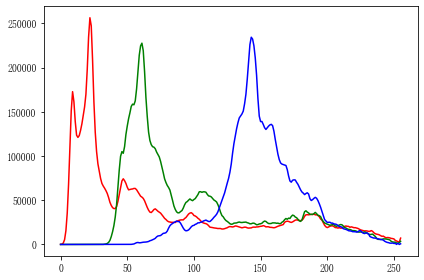

In [6]:
import maysics as ms

pic = ms.load('test1.jpg', pic=True)
ms.image.hist_graph(pic)

### DEMO 3-4：绘制RGB图像直方图

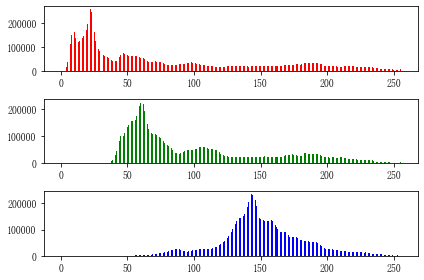

In [7]:
import maysics as ms

pic = ms.load('test1.jpg', pic=True)
ms.image.hist_graph(pic, mode=2)

<br></br>
## 线性增强：linear_enhancement
将灰度等级进行如下图变换，其中L是灰度等级上限：

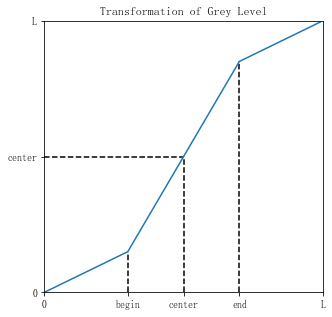

In [8]:
import numpy as np
from matplotlib import pyplot as plt

def f(x):
    y = x.copy()
    for i in range(len(y)):
        if y[i] < 0.3:
            y[i] = 0.5 * y[i]
        elif y[i] > 0.7:
            y[i] = 0.5 * y[i] + 0.5
        else:
            y[i] = 1.75 * y[i] - 0.375
    return y
x = np.arange(0, 1, 0.01)
y = f(x)

fig = plt.figure(figsize=(5,5))
plt.plot(x, y)
plt.vlines(0.3, 0, 0.15, color='black', linestyles='--')
plt.vlines(0.5, 0, 0.5, color='black', linestyles='--')
plt.vlines(0.7, 0, 0.85, color='black', linestyles='--')
plt.hlines(0.5, 0, 0.5, color='black', linestyles='--')
plt.xticks((0, 0.3, 0.5, 0.7, 1), ('0', 'begin', 'center', 'end', 'L'))
plt.yticks((0, 0.5, 1), ('0', 'center', 'L'))
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Transformation of Grey Level')
plt.show()

linear_enhancement(data, begin, end, k, center=None, dtype=float)
<br>```data```是图像数据
<br>```begin```、```end```意义如上图所示
<br>```k```是```begin```至```end```间线段的斜率
<br>```center```是灰度等级变换中的不变点，默认为```begin```与```end```的中点
<br>```dtype```是输出图像数据的数据格式

### DEMO 4-1：对灰度图像的线性增强

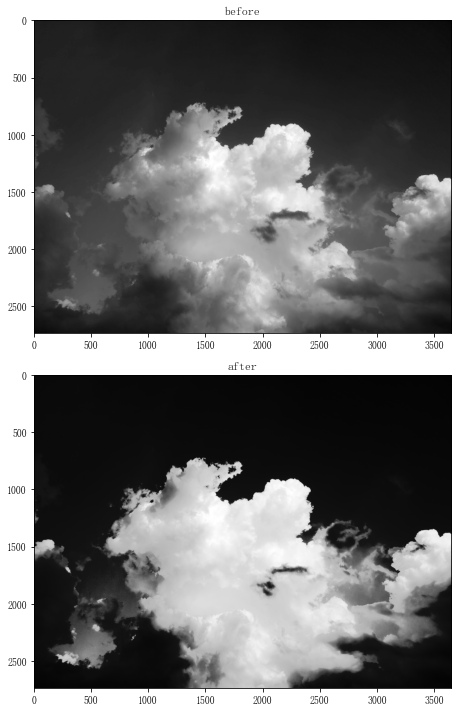

In [9]:
import maysics as ms
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(20, 10))
pic = ms.load('test1.jpg', pic=True)

# 转换为灰度图像
pic = ms.image.l_convert(pic, 'uint8')

ax = fig.add_subplot(2, 1, 1)
ax.imshow(pic, cmap=plt.cm.gray)
ax.set_title('before')

pic = ms.image.linear_enhancement(pic, 90, 120, 5, dtype='uint8')
ax = fig.add_subplot(2, 1, 2)
ax.imshow(pic, cmap=plt.cm.gray)
ax.set_title('after')

plt.tight_layout()

### DEMO 4-2：对RGB图像的线性增强

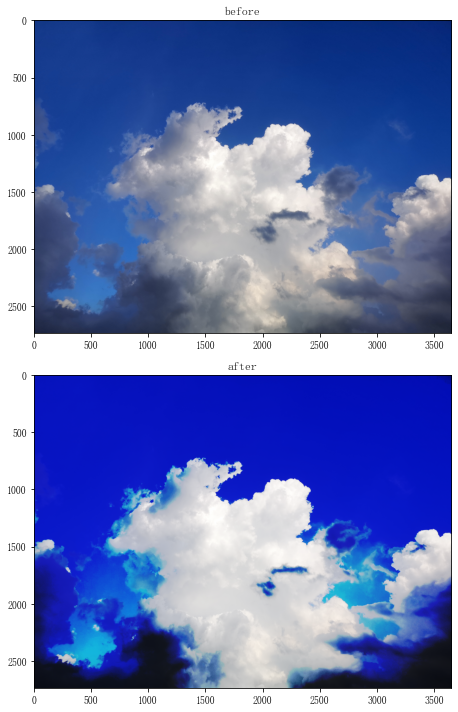

In [10]:
import maysics as ms
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(20, 10))
pic = ms.load('test1.jpg', pic=True)

ax = fig.add_subplot(2, 1, 1)
ax.imshow(pic, cmap=plt.cm.gray)
ax.set_title('before')

pic = ms.image.linear_enhancement(pic, 90, 120, 5, dtype='uint8')
ax = fig.add_subplot(2, 1, 2)
ax.imshow(pic, cmap=plt.cm.gray)
ax.set_title('after')

plt.tight_layout()

<br></br>
## 直方图均衡
$$grey_{new-k} = \frac{L+1}{N}\sum_{i=0}^{k}grey_{i}$$
<br>其中，L是灰度等级上限，N是图像像素数

<br>hist_equa(data, dtype=float)
<br>```data```是图像数据
<br>```dtype```是输出图像数据的数据格式

### DEMO 5-1：灰度图像直方图均衡

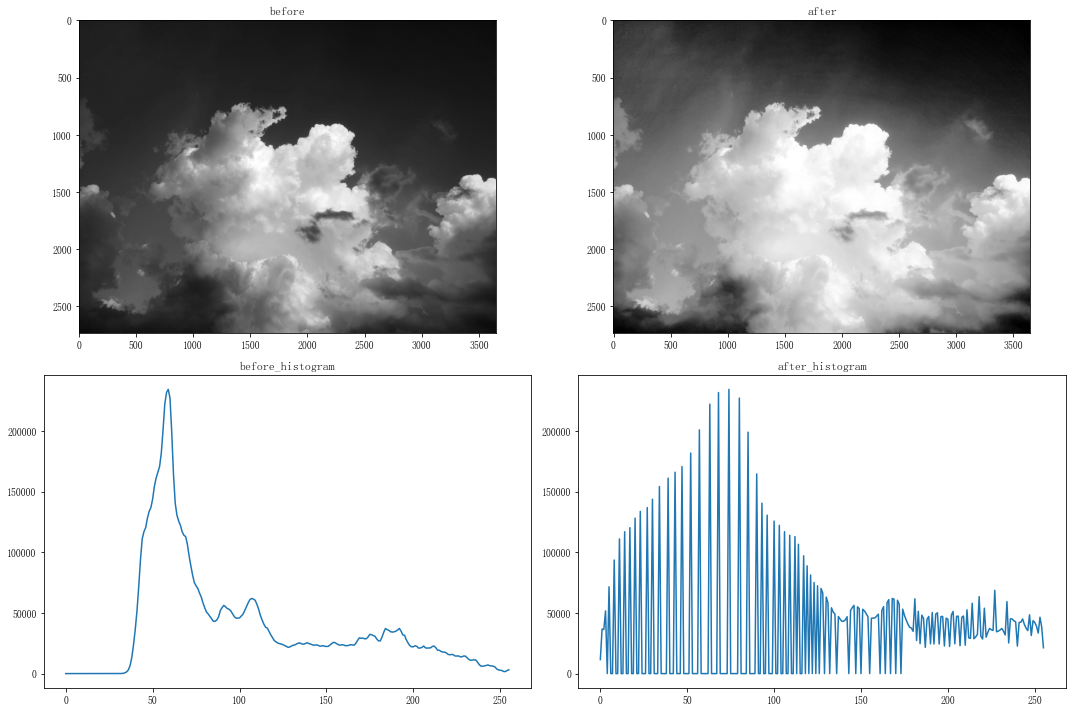

In [11]:
import maysics as ms
import numpy as np
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(15, 10))
x = np.arange(0, 256)
pic_1 = ms.load('test1.jpg', pic=True)

# 转换为灰度图像
pic_1 = ms.image.l_convert(pic_1, dtype='uint8')
hist_1 = ms.image.hist(pic_1)

# 直方图均衡
pic_2 = ms.image.hist_equa(pic_1, dtype='uint8')
hist_2 = ms.image.hist(pic_2)

# 绘制图像
ax = fig.add_subplot(2,2,1)
ax.imshow(pic_1, cmap=plt.cm.gray)
ax.set_title('before')

ax = fig.add_subplot(2,2,2)
ax.imshow(pic_2, cmap=plt.cm.gray)
ax.set_title('after')

ax = fig.add_subplot(2,2,3)
ax.plot(x, hist_1)
ax.set_title('before_histogram')

ax = fig.add_subplot(2,2,4)
ax.plot(x, hist_2)
ax.set_title('after_histogram')

plt.tight_layout()

### DEMO 5-2：RGB图像直方图均衡

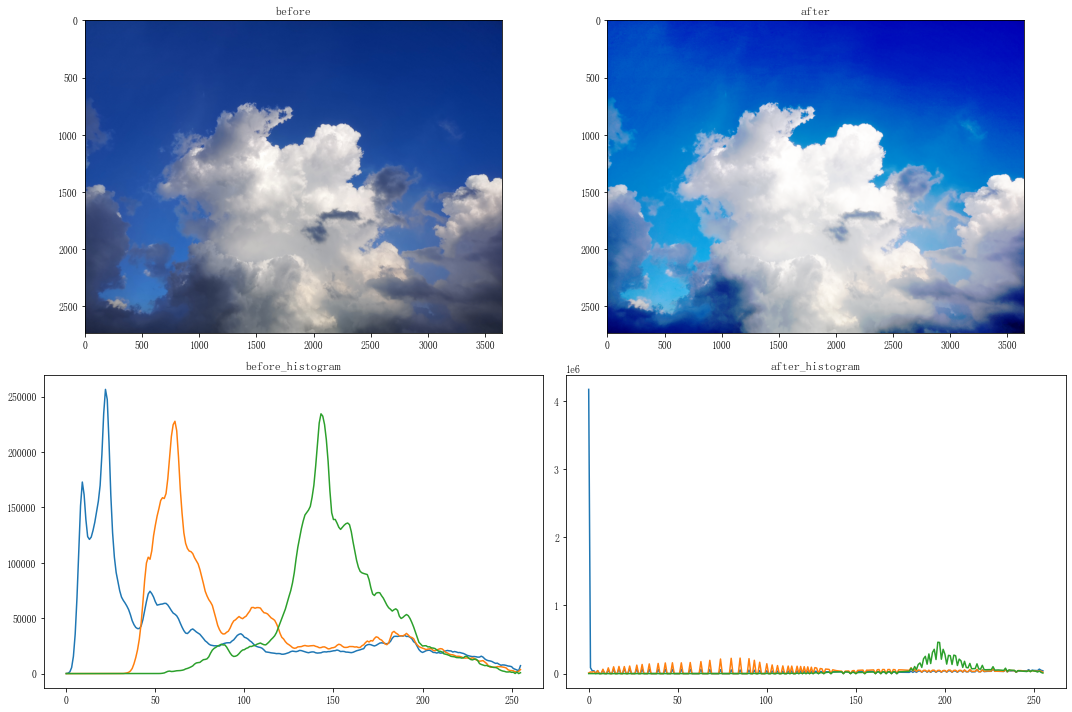

In [12]:
import maysics as ms
import numpy as np
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(15, 10))
x = np.arange(0, 256)
pic_1 = ms.load('test1.jpg', pic=True)
hist_1 = ms.image.hist(pic_1)

# 直方图均衡
pic_2 = ms.image.hist_equa(pic_1, dtype='uint8')
hist_2 = ms.image.hist(pic_2)

# 绘制图像
ax = fig.add_subplot(2,2,1)
ax.imshow(pic_1, cmap=plt.cm.gray)
ax.set_title('before')

ax = fig.add_subplot(2,2,2)
ax.imshow(pic_2, cmap=plt.cm.gray)
ax.set_title('after')

ax = fig.add_subplot(2,2,3)
ax.plot(x, hist_1[0])
ax.plot(x, hist_1[1])
ax.plot(x, hist_1[2])
ax.set_title('before_histogram')

ax = fig.add_subplot(2,2,4)
ax.plot(x, hist_2[0])
ax.plot(x, hist_2[1])
ax.plot(x, hist_2[2])
ax.set_title('after_histogram')

plt.tight_layout()

<br></br>
## 图像拉普拉斯算子：laplace
laplace(data, mode=8, dtype=float)
<br>```data```是图像数据
<br>```mode```可选4或8，分别对应两种掩膜：
<br>$$
M_{4}=\left( \begin{array}{cc} 0 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 0 \end{array} \right)
$$

$$
M_{8}=\left( \begin{array}{cc} -1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1 \end{array} \right)
$$
<br>```dtype```是输出图像数据的数据格式


### DEMO 6-1：mode=8

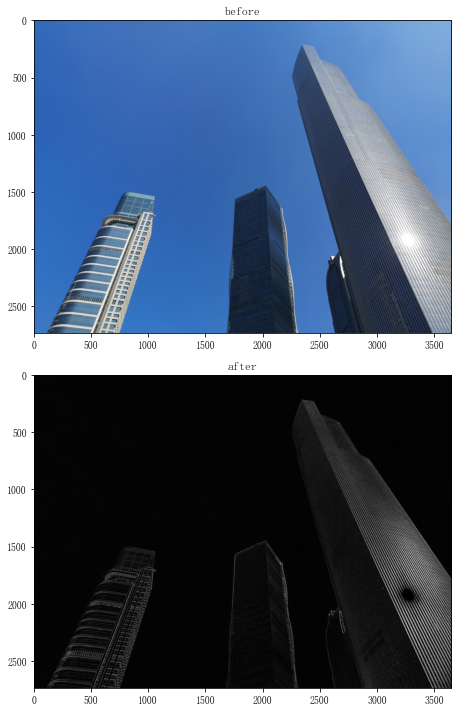

In [13]:
import maysics as ms
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(20, 10))
pic = ms.load('test2.jpg', pic=True)

ax = fig.add_subplot(2, 1, 1)
ax.imshow(pic, cmap=plt.cm.gray)
ax.set_title('before')

pic = ms.image.laplace(pic, dtype='uint8')
ax = fig.add_subplot(2, 1, 2)
ax.imshow(pic, cmap=plt.cm.gray)
ax.set_title('after')

plt.tight_layout()

### DEMO 6-2：mode=4

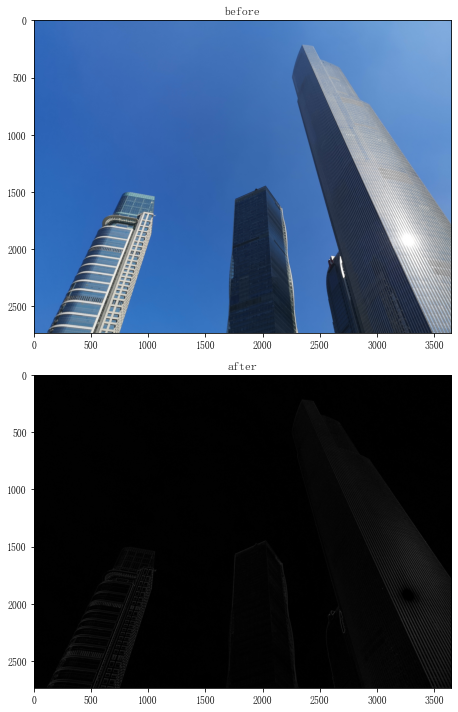

In [14]:
import maysics as ms
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(20, 10))
pic = ms.load('test2.jpg', pic=True)

ax = fig.add_subplot(2, 1, 1)
ax.imshow(pic, cmap=plt.cm.gray)
ax.set_title('before')

pic = ms.image.laplace(pic, mode=4, dtype='uint8')
ax = fig.add_subplot(2, 1, 2)
ax.imshow(pic, cmap=plt.cm.gray)
ax.set_title('after')

plt.tight_layout()